# Homework 2: Machine Learning, Feature Engineering, validation

These are the libraries you are allowed to use today. Do not add any library.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**Problem 1:** First, use the code from last week to prepare two datasets. One will serve as a training set, while the other will serve as a test set. For the test, make sure that you use dataset E. For the train set, it could be anything but E. Note: depending on whether you already split the features from the targets, you might have to load 2 or 4 csv files. Either is fine.

In [2]:
%run ../hw1/hw1_revise.ipynb

100%|██████████| 1291/1291 [00:03<00:00, 388.48it/s]


In [10]:
X_train = np.array(pd.read_csv('./train/features.csv'))
y_train = np.array(pd.read_csv('./train/solubility.csv'))
X_test = np.array(pd.read_csv('./test/features.csv'))
y_test = np.array(pd.read_csv('./test/solubility.csv'))

**Problem 2:** Define the following function.<br>
*Input:* Two numpy arrays $a$ and $b$ of same length, say $n$. One is meant to contain predicted values, the other ground truth values.<br>
*Output:* The mean absolute value of the two arrays.
$$
\sum_{i=1}^n \frac{|a_i - b_i|}{n}
$$

In [11]:
def mean_absolute_error(y_truth,y_pred):
    mae = np.sum(abs(np.array(y_truth) - np.array(y_pred)))/len(y_truth)
    return mae

**Problem 3:** Implement a function that fits a linear regression and compute train and test loss.<br>
*Input:* 4 datasets: training and testing features, training and testing target.<br>
*Output:* mean absolute error of a linear regression for both the train set and the test set.<br>
*Hint:* you need to make use of the fundamental methods of an sklearn model: fit and predict.

In [12]:
def ml(X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    x_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, x_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    return train_mae, test_mae

**Problem 4:** Implement a function that transforms the feature set (train and test) into multiple feature sets, one per polynomial degree<br>
*Input:* training feature set, testing feature set, list of degrees<br>
*Output:* two lists. The first list contains the transform of the training feature set for the different degrees, the second list is the same for the testing feature set.

In [13]:
def engineer(X_train,X_test,degrees):
    train_transform = []
    test_transform = []
    for i in degrees:
        poly = PolynomialFeatures(i)
        train_transform.append(poly.fit_transform(X_train))
        test_transform.append(poly.fit_transform(X_test))
    return train_transform, test_transform

In [14]:
degrees = [1,2,3,4]

In [15]:
X_train_l, X_test_l = engineer(X_train,X_test,degrees)

**Problem 5:** Implement a function that plots a validation curve.<br>
*Input:* list of training features, training targets, list of testing features, testing target<br>
*Output:* none. The function should plot the validation curve. Abcissa: degree, ordinate: mean absolute error for both train and test.

In [16]:
def validation_curve(X_train_l,y_train,X_test_l,y_test):
    all_train_mae = [] 
    all_test_mae = []
    for i in range(len(X_train_l)):
        tr_mae, ts_mae = ml(X_train_l[i],y_train,X_test_l[i],y_test)
        all_train_mae.append(tr_mae)
        all_test_mae.append(ts_mae)
    
    plt.plot(degrees,all_train_mae,label='train loss')
    plt.plot(degrees,all_test_mae,label='test loss')
    plt.legend()
    pass

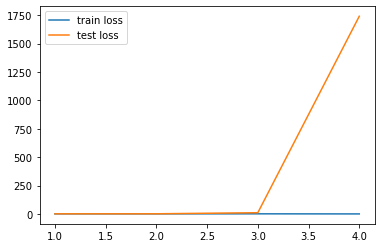

In [17]:
validation_curve(X_train_l,y_train,X_test_l,y_test)

**Problem 6:** Implement a function that plots the learning curve.<br>
*Input:* list of training features, training targets, list of testing features, testing target<br>
*Output:* none. The function should plot the learning curve. Abcissa: dataset size, ordinate: mean absolute error for both train and test.

In [18]:
def learning_curve(X_train,y_train,X_test,y_test):
    all_train_mae = [] 
    all_test_mae = []
    for d in range(50,len(X_train),50):
        train_x = X_train[:d]
        train_y = y_train[:d]
        test_x = X_test[:d]
        test_y = y_test[:d]
        tr_mae, ts_mae = ml(train_x,train_y,test_x,test_y)
        all_train_mae.append(tr_mae)
        all_test_mae.append(ts_mae)
        
    my_x = np.arange(len(all_train_mae))
    plt.plot(my_x,all_train_mae,label='train loss')
    plt.plot(my_x,all_test_mae,label='test loss')
    plt.legend()
    plt.show()
    pass   

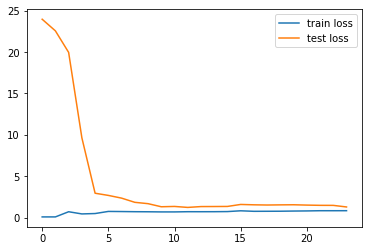

In [19]:
learning_curve(X_train_l[1],y_train,X_test_l[1],y_test)

The rest of the homework is optional and will not count toward the decision to receive a 0 or a 1. 

**Problem 7:** Implement a function that computes k folds for a feature and target set.<br>
*Input:* feature set, target set, number of folds $k$<br>
*Output:* list of partitions of the feature set, list of partitions of the target set.

In [12]:
def compute_folds(X_train,y_train,k):
    pass

**Problem 8:** Implement a function that computes the k-fold cross validated mean absolute error.<br>
*Input:* feature set and target set, number of folds $k$<br>
*Output:* macro averaged mean absolute error for both train and test.

In [13]:
def cross_validate(X_train,y_train,k):
    pass

In [14]:
cross_validate(X_train_l[1],y_train,5)

(4.199578801676423e-15, 4.2813305127933616e-15)